In [4]:
import pandas as pd

# Read the text file
with open('dataset.txt', 'r') as file:
    data = file.readlines()

# Split each line into text and sentiment label
texts = []
labels = []
for line in data:
    label, text = line.strip().split(' ', 1)
    texts.append(text)
    labels.append(int(label.strip('__label__')))

product = pd.DataFrame({'text':texts, 'label':labels})
# product

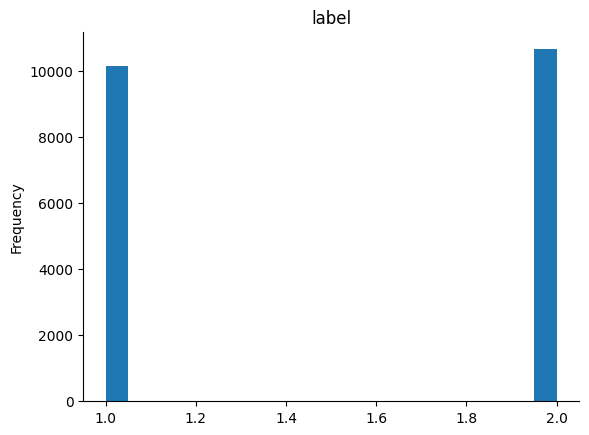

In [5]:
from matplotlib import pyplot as plt
product['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Cleaning the data / preprocessing**

In [6]:
# Converting every sentence to lowercase
product['text'] = product['text'].apply(lambda x: x.lower())

# removing special charecters
import re

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

product['text'] = product['text'].apply(lambda x: remove_special_characters(x))

# removing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
def remove_stop_words(text):
 tokens = word_tokenize(text)
 text_with_no_stop_words = [token for token in tokens if not token in stop_words]
 reformed_text =' '.join(text_with_no_stop_words)
 return reformed_text

product['text'] = product['text'].apply(lambda x: remove_stop_words(x))

# stemming
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

def lemmatise_sentence(text):
 token_words = word_tokenize(text)
 lemmatized_text = []
 for word in token_words:
  lemmatized_text.append(stemmer.stem(word))
  lemmatized_text.append(" ")
 return "".join(lemmatized_text)
product['text'] = product['text'].apply(lambda x: lemmatise_sentence(x))
# product

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Training and Testing**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(product['text'], product['label'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy = nb.score(X_test,y_test)
print(nb_accuracy)

0.8372539606337014


Accuracy: 0.837
Precision: [0.82697807 0.84767892]
Recall: [0.84634146 0.82844991]
F1 Score: [0.83654773 0.83795411]


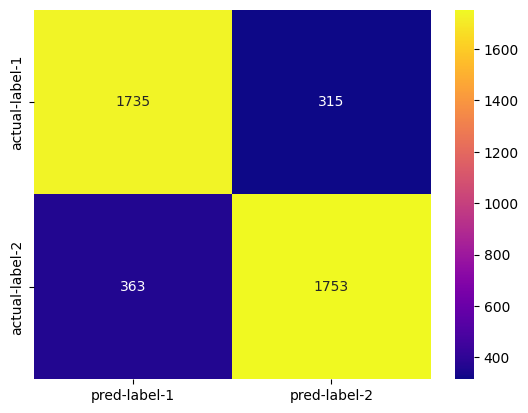

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['pred-label-1','pred-label-2'],
            yticklabels=['actual-label-1','actual-label-2'], annot=True,
            fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [9]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
logistic_accuracy = lr.score(X_test, y_test)
print(logistic_accuracy)

0.842534805568891


Accuracy: 0.843
Precision: [0.84780439 0.83765032]
Recall: [0.82878049 0.85586011]
F1 Score: [0.83818451 0.84665732]


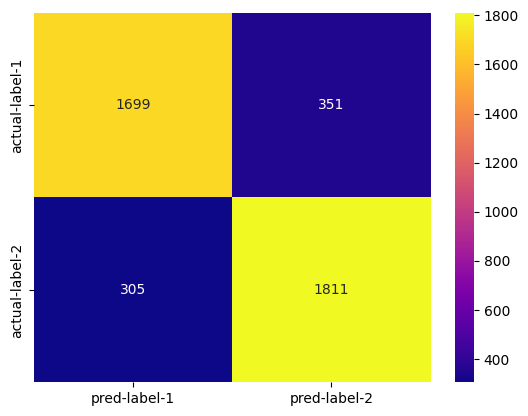

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['pred-label-1','pred-label-2'],
            yticklabels=['actual-label-1','actual-label-2'], annot=True,
            fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))